# **Titanic Survivours Predicton**

I Abdul Aziz Ramzan Bearing Roll No. 160920748310 from Lords Institute Of Engg. & Tech.

prepared a python program using Machine learning algorithms for the
Prediction of Titanic survivours

# Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
tt_train = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTKn41rdGyPHstLVMuTHeHz-ty055ZJI1ecQ_DKqc-YQQrkeH0upxW3P5NiBbQVGPrL__E_78doUnz1/pub?gid=283303487&single=true&output=csv')

In [5]:
tt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
tt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
tt_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
tt_train.shape

(891, 12)

In [9]:
tt_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **what data is actually missing**

In [10]:
total = tt_train.isnull().sum().sort_values(ascending=False)
percent_1 = tt_train.isnull().sum()/tt_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [11]:
tt_train.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<ipython-input-12-b3ae21b217dd>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
<ipython-input-12-b3ae21b217dd>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==0].

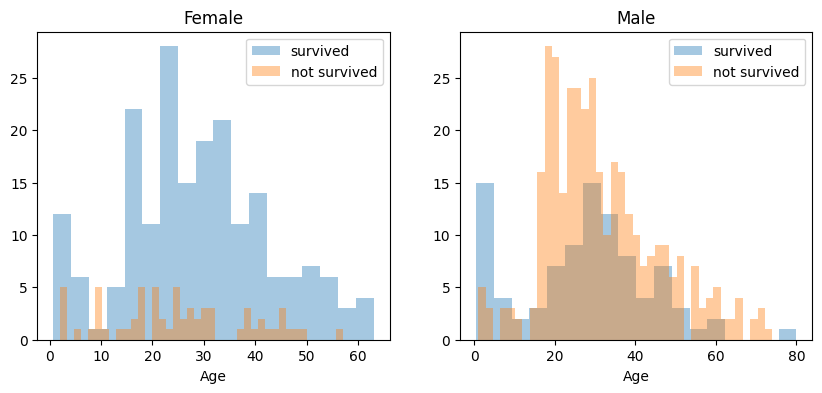

In [12]:
#Age and Sex
from matplotlib import pyplot as plt

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = tt_train[tt_train['Sex']=='female']
men = tt_train[tt_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

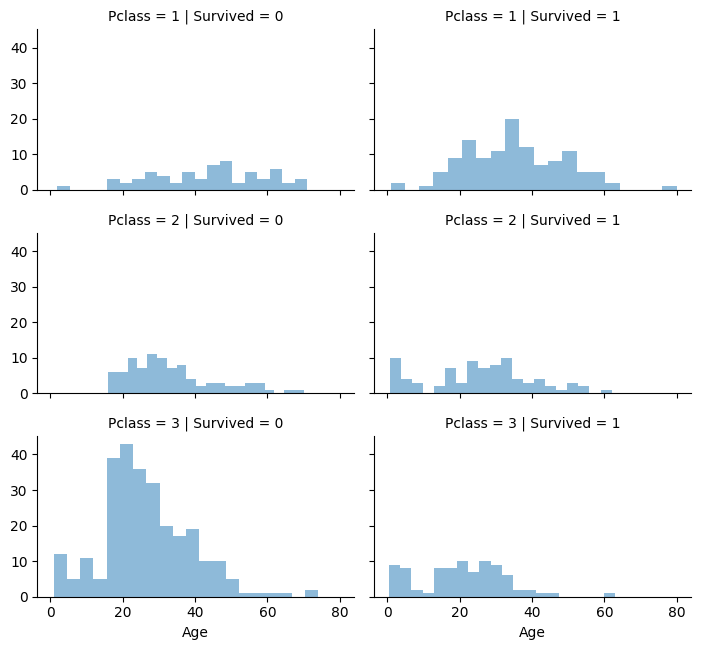

In [13]:

#pclass
grid = sns.FacetGrid(tt_train, col='Survived', row='Pclass', height=2.2 , aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [14]:
test_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS2ad8yfpreMKJYxkjkvQ1JrOQ7kKOs6zFGm6x-KiajoBP-7J7psQ84QJiDmraJPMIHwEK3LA7pME61/pub?gid=639943138&single=true&output=csv")


In [15]:
#SibSp and Parch:

data = [tt_train, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
tt_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

# **Data Preprocessing**

In [16]:
tt_train = tt_train.drop(['PassengerId'], axis=1)


In [17]:
#Cabin

# import re
# deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
# data = [tt_train, test_df]

# for dataset in data:
#     dataset['Cabin'] = dataset['Cabin'].fillna("U0")
#     dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
#     dataset['Deck'] = dataset['Deck'].map(deck)
#     dataset['Deck'] = dataset['Deck'].fillna(0)
#     dataset['Deck'] = dataset['Deck'].astype(int)
# # we can now drop the cabin feature
# tt_train = tt_train.drop(['Cabin'], axis=1)
# test_df = test_df.drop(['Cabin'], axis=1)

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [tt_train, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group() if re.compile("([a-zA-Z]+)").search(x) else "")
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
tt_train = tt_train.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)



In [18]:
#Age
data = [tt_train, test_df]

for dataset in data:
    mean = tt_train["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = tt_train["Age"].astype(int)
tt_train["Age"].isnull().sum()



0

In [19]:
#Embarked

tt_train['Embarked'].describe()

common_value = 'S'
data = [tt_train, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [20]:
tt_train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

# Converting Features:


In [21]:
tt_train.info()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 

In [22]:
#Fare

data = [tt_train, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [23]:
#Name

data = [tt_train, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
tt_train = tt_train.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [24]:
#Sex - Converting sex into numeric

genders = {"male": 0, "female": 1}
data = [tt_train, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


In [25]:
#Ticket
tt_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [26]:
#Ticket

tt_train = tt_train.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)


In [27]:
#Embarked - Converting Embarked into numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [tt_train, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)


# Creating Categories

In [28]:
#Age

data = [tt_train, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [29]:
tt_train['Age'].value_counts()

4    161
6    158
5    152
3    136
2    122
1     94
0     68
Name: Age, dtype: int64

In [30]:
tt_train.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,3,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [31]:
tt_train['Age'].value_counts()

4    161
6    158
5    152
3    136
2    122
1     94
0     68
Name: Age, dtype: int64

In [32]:
#Fare:

data = [tt_train, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)



In [33]:
print(test_df.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'relatives', 'not_alone', 'Deck', 'Title'],
      dtype='object')


# **Training Dataset**

In [34]:
X_train = tt_train.drop("Survived", axis=1)
y_train = tt_train["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()


In [35]:
#importing library for Decisiontreeclassifier

from sklearn.tree import DecisionTreeClassifier


In [36]:
tt_train = tt_train.replace(r'^\s*$', np.nan, regex=True)
X_test = X_test.replace(r'^\s*$', np.nan, regex=True)
# tt_train = tt_train[['Sex']].astype({'Sex': int})



In [37]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("Predicted labels:", Y_pred)

In [42]:
print("Accuracy score:", acc_decision_tree)


Accuracy score: 92.82


In [39]:
# from sklearn.ensemble import HistGradientBoostingClassifier

# hgb = HistGradientBoostingClassifier()
# hgb.fit(X_train, Y_train)
# Y_pred = hgb.predict(X_test)

In [41]:
# from sklearn.linear_model import SGDClassifier
# from sklearn import linear_model

# sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
# sgd.fit(X_train, Y_train)
# Y_pred = sgd.predict(X_test)

# sgd.score(X_train, Y_train)

# acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)